In [22]:
import geopandas as gpd
import pandas as pd
from os import path, mkdir
import plotly.express as px
import mapboxgl as mbx
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [23]:
las_fn = path.join('zip://','initial_data','local_authorities.zip')
las = gpd.read_file(las_fn)
las.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [24]:
barnet = las[las.lad19nm=='Barnet']

In [52]:
new_barnet_loc = Point(-0.1693069, 51.6526383)
cdh_loc = Point(-0.2008015,51.5622808)
libs = gpd.read_file(path.join('initial_data','libraries.json')).sort_values('library').reset_index().drop('index',axis=1)
libs = libs[libs.library!='East Barnet Library']
libs.loc[len(libs.index)+1] = ['New Barnet Library', new_barnet_loc]
# libs.loc[len(libs.index)+1] = ['Childs Hill Library', new_barnet_loc]
libs = libs.set_crs(4326).to_crs(27700)
libs

,library,geometry
0,Burnt Oak Library,POINT (520376.541 190802.064)
1,Childs Hill Library,POINT (524812.499 186350.970)
2,Chipping Barnet Library,POINT (524280.883 196779.310)
3,Colindale Library,POINT (521649.288 190675.609)
5,East Finchley Library,POINT (527024.713 189932.304)
6,Edgware Library,POINT (519595.917 192240.191)
7,Finchley Church End Library,POINT (525098.635 190550.985)
8,Golders Green Library,POINT (524712.598 187745.348)
9,Hendon Library,POINT (522783.533 189236.852)
10,Mill Hill Library,POINT (521744.328 192185.620)


In [54]:
types = {'Burnt Oak Library': 'core',
 'Childs Hill Library': 'partnership',
 'Chipping Barnet Library': 'core+',
 'Colindale Library': 'core+',
 'East Finchley Library': 'core',
 'Edgware Library': 'core+',
 'Finchley Church End Library': 'core+',
 'Golders Green Library': 'core',
 'Hendon Library': 'core',
 'Mill Hill Library': 'partnership',
 'North Finchley Library': 'core',
 'Osidge Library': 'core',
 'South Friern Library': 'partnership',
 'New Barnet Library': 'partnership'}
lib_types= pd.DataFrame({'library': types.keys(), 'type': types.values()})
libs = libs.merge(lib_types)

In [56]:
# libs.to_crs(4326).to_file(path.join('data','libraries.json'), driver='GeoJSON')

In [27]:
libs_radii = gpd.GeoDataFrame(libs, geometry=libs.buffer(1000))
libs_radii

,library,geometry,type
0,Burnt Oak Library,"POLYGON ((521376.541 190802.064, 521371.726 19...",core
1,Childs Hill Library,"POLYGON ((525812.499 186350.970, 525807.684 18...",partnership
2,Chipping Barnet Library,"POLYGON ((525280.883 196779.310, 525276.067 19...",core+
3,Colindale Library,"POLYGON ((522649.288 190675.609, 522644.473 19...",core+
4,East Finchley Library,"POLYGON ((528024.713 189932.304, 528019.898 18...",core
5,Edgware Library,"POLYGON ((520595.917 192240.191, 520591.102 19...",core+
6,Finchley Church End Library,"POLYGON ((526098.635 190550.985, 526093.820 19...",core+
7,Golders Green Library,"POLYGON ((525712.598 187745.348, 525707.783 18...",core
8,Hendon Library,"POLYGON ((523783.533 189236.852, 523778.718 18...",core
9,Mill Hill Library,"POLYGON ((522744.328 192185.620, 522739.513 19...",partnership


In [28]:
libs_radii.to_file(path.join('data','libs_radii.json'), driver='GeoJSON')

In [29]:
lsoas = gpd.read_file(path.join('zip://','initial_data', 'lsoas.zip'))

<AxesSubplot:>

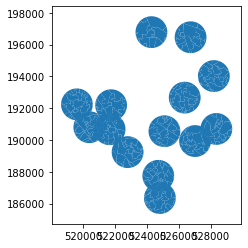

In [30]:
libs_lsoas = gpd.overlay(lsoas, libs, how='intersection')
libs_lsoas.plot()

In [31]:
# make the geometries full shapes again rather than clipped at the edge of the circle
libs_lsoas = libs_lsoas[['LSOA11CD','LSOA11NM','library']].merge(lsoas, how='left')[['LSOA11CD','LSOA11NM','library', 'geometry']]
libs_lsoas

,LSOA11CD,LSOA11NM,library,geometry
0,E01000115,Barnet 009A,Osidge Library,"POLYGON ((528816.368 194812.844, 528822.375 19..."
1,E01000116,Barnet 009B,Osidge Library,"POLYGON ((528290.550 194677.039, 528292.580 19..."
2,E01000117,Barnet 010A,Osidge Library,"POLYGON ((527869.109 194357.986, 527866.504 19..."
3,E01000118,Barnet 010B,Osidge Library,"POLYGON ((528104.534 194492.629, 528101.067 19..."
4,E01000119,Barnet 009C,Osidge Library,"POLYGON ((529253.398 194418.579, 529250.584 19..."
...,...,...,...,...
281,E01000288,Barnet 004C,Chipping Barnet Library,"POLYGON ((524987.174 196115.443, 525000.000 19..."
282,E01000292,Barnet 001E,Chipping Barnet Library,"POLYGON ((524571.652 196441.188, 524571.938 19..."
283,E01000293,Barnet 001F,Chipping Barnet Library,"POLYGON ((524761.391 196322.729, 524773.813 19..."
284,E01000294,Barnet 004F,Chipping Barnet Library,"POLYGON ((524144.398 196427.824, 524147.000 19..."


In [32]:
imd = pd.read_csv(path.join('initial_data', 'imd.csv'))
imd.rename({'LSOA code (2011)':'LSOA11CD', 'LSOA name (2011)':'LSOA11NM'}, axis=1, inplace=True)

In [33]:
imd = imd[[x for x in imd.columns if 'LSOA' in x or 'decile' in x.lower()]]
imd.columns = [x.replace(' Decile (where 1 is most deprived 10% of LSOAs)', '') for x in imd.columns]

In [34]:
# melt imd so it's long ways, and filter out any rows greater than 3
imd = pd.melt(imd, id_vars=imd.columns[:2], value_vars=imd.columns[2:]).query('value<3')

In [35]:
imd = imd[imd.LSOA11CD.isin(list(libs_lsoas.LSOA11CD.unique()))]
imd

,LSOA11CD,LSOA11NM,variable,value
117,E01000121,Barnet 010C,Index of Multiple Deprivation (IMD),2
122,E01000126,Barnet 026A,Index of Multiple Deprivation (IMD),2
146,E01000151,Barnet 026B,Index of Multiple Deprivation (IMD),2
148,E01000153,Barnet 026D,Index of Multiple Deprivation (IMD),2
216,E01000221,Barnet 039B,Index of Multiple Deprivation (IMD),1
...,...,...,...,...
494733,E01002123,Harrow 007E,Outdoors Sub-domain,2
494735,E01002125,Harrow 010B,Outdoors Sub-domain,2
515616,E01023584,Hertsmere 004D,Outdoors Sub-domain,1
525307,E01033572,Barnet 030E,Outdoors Sub-domain,2


In [36]:
records = imd.to_dict(orient='records')

In [37]:
count = imd.iloc[:, :3].groupby(['LSOA11CD','LSOA11NM']).count().rename({'variable':'count_of_variables'}, axis=1).reset_index()
count

,LSOA11CD,LSOA11NM,count_of_variables
0,E01000115,Barnet 009A,1
1,E01000118,Barnet 010B,1
2,E01000119,Barnet 009C,1
3,E01000121,Barnet 010C,7
4,E01000122,Barnet 009E,1
...,...,...,...
206,E01002124,Harrow 010A,2
207,E01002125,Harrow 010B,3
208,E01023584,Hertsmere 004D,5
209,E01033572,Barnet 030E,4


In [38]:
def _get_records(r):
    code = r['LSOA11CD']
    return [{'variable': x['variable'], 'value': x['value']} for x in records if x['LSOA11CD']==code]
count['record'] = count.apply(_get_records, axis=1)
count

,LSOA11CD,LSOA11NM,count_of_variables,record
0,E01000115,Barnet 009A,1,"[{'variable': 'Outdoors Sub-domain', 'value': 2}]"
1,E01000118,Barnet 010B,1,"[{'variable': 'Wider Barriers Sub-domain', 'va..."
2,E01000119,Barnet 009C,1,"[{'variable': 'Outdoors Sub-domain', 'value': 2}]"
3,E01000121,Barnet 010C,7,[{'variable': 'Index of Multiple Deprivation (...
4,E01000122,Barnet 009E,1,[{'variable': 'Barriers to Housing and Service...
...,...,...,...,...
206,E01002124,Harrow 010A,2,[{'variable': 'Barriers to Housing and Service...
207,E01002125,Harrow 010B,3,[{'variable': 'Barriers to Housing and Service...
208,E01023584,Hertsmere 004D,5,[{'variable': 'Barriers to Housing and Service...
209,E01033572,Barnet 030E,4,[{'variable': 'Barriers to Housing and Service...


In [39]:
count.query('count_of_variables>1').iloc[3]['record']

[{'variable': 'Barriers to Housing and Services', 'value': 1},
 {'variable': 'Income Deprivation Affecting Older People (IDAOPI)',
  'value': 2},
 {'variable': 'Wider Barriers Sub-domain', 'value': 1},
 {'variable': 'Outdoors Sub-domain', 'value': 2}]

In [44]:
# final_gdf
gdf = libs_lsoas.merge(count)
gdf['record'] = gdf.record.astype(str)
gdf = gpd.overlay(gpd.GeoDataFrame(gdf, geometry=gdf.geometry, crs=27700), barnet, how='intersection').to_crs(4326)

# gdf= gpd.GeoDataFrame(gdf, geometry=gdf.geometry, crs=27700).to_crs(4326)
# gdf.to_file(path.join('data','data.json'), driver='GeoJSON')

In [45]:
gdf.to_file(path.join('data','data.json'), driver='GeoJSON')

In [46]:
libs.to_crs(4326).to_file(path.join('data','libraries.json'), driver='GeoJSON')
libs_radii.to_crs(4326).to_file(path.join('data','libs_radii.json'), driver='GeoJSON')

In [47]:
libs

,library,geometry,type
0,Burnt Oak Library,"POLYGON ((521376.541 190802.064, 521371.726 19...",core
1,Childs Hill Library,"POLYGON ((525812.499 186350.970, 525807.684 18...",partnership
2,Chipping Barnet Library,"POLYGON ((525280.883 196779.310, 525276.067 19...",core+
3,Colindale Library,"POLYGON ((522649.288 190675.609, 522644.473 19...",core+
4,East Finchley Library,"POLYGON ((528024.713 189932.304, 528019.898 18...",core
5,Edgware Library,"POLYGON ((520595.917 192240.191, 520591.102 19...",core+
6,Finchley Church End Library,"POLYGON ((526098.635 190550.985, 526093.820 19...",core+
7,Golders Green Library,"POLYGON ((525712.598 187745.348, 525707.783 18...",core
8,Hendon Library,"POLYGON ((523783.533 189236.852, 523778.718 18...",core
9,Mill Hill Library,"POLYGON ((522744.328 192185.620, 522739.513 19...",partnership


In [60]:
with open(path.join('data', 'barnet_bounds.json'), 'w') as f:
    f.write(barnet.to_crs(4326).bounds.to_json(orient='records'))